In [1]:
# Install various Python packages needed to create and plot graphs
import grinpy as gp
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# In this code block, we define a function called "OptimalColoring" that inputs
# a graph G and outputs an assignment of colors to vertices, where the number
# of colors used is as few as possible.  This "graph coloring" technique is
# how we solved both Problems #1 and #2, converting a hard problem into an
# equivalent simpler problem.

def OptimalColoring(G):

    # Determine the number of vertices in graph G.
    Vertices = nx.nodes(G)
    
    # Calculate the "Chromatic Number" of an input graph G, i.e., the fewest
    # number of colors needed to color graph G so that each edge connects
    # two points with two different colors.  We rely on an open-source
    # Python program that automatically makes this computation.
    ChromaticNumber = gp.chromatic_number(G)
    
    # Find one way to color the vertices of graph G to achieve the best
    # possible result, i.e., a coloring with as few colors as possible.
    SolvedProblem = False
    while SolvedProblem == False:
        OurColoring = nx.coloring.greedy_color(G, strategy="random_sequential")
        ColorsUsed = max(OurColoring[v] for v in Vertices)+1
        if ColorsUsed == ChromaticNumber:
            SolvedProblem = True

    # Print the result of the above step.  Python is quirky in that the 
    # first integer is 0, not 1.  Fix this by adding 1, to ensure that the 
    # first color that we use is 1, rather than 0.
    for c in range(ColorsUsed):
        print("")
        print("Color", c+1, "is given to")
        for v in Vertices:
            if OurColoring[v]==c:
                print(v)

In [3]:
# Input the data from Problem 1 (USA States)

AmericanStates = ['Washington', 'Oregon', 'Idaho', 'California', 'Nevada', 'Utah', 'Arizona']

BorderList = []
BorderList.append(['Washington', 'Oregon'])
BorderList.append(['Washington', 'Idaho'])
BorderList.append(['Oregon', 'Idaho'])
BorderList.append(['Oregon', 'California'])
BorderList.append(['Oregon', 'Nevada'])
BorderList.append(['Idaho', 'Nevada'])
BorderList.append(['Idaho', 'Utah'])
BorderList.append(['California', 'Nevada'])
BorderList.append(['Nevada', 'Utah'])
BorderList.append(['California', 'Arizona'])
BorderList.append(['Nevada', 'Arizona'])
BorderList.append(['Utah', 'Arizona'])


Color 1 is given to
Washington
California
Utah

Color 2 is given to
Idaho
Arizona

Color 3 is given to
Nevada

Color 4 is given to
Oregon


C:\Users\Richard\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


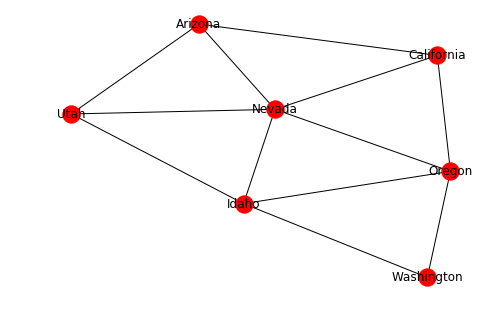

In [4]:
# Convert the information above into a graph G.  First we create the vertices
# of our graph, which are precisely the set of Western US States.
G = nx.Graph()
G.add_nodes_from(AmericanStates)
Vertices = list(G.nodes)

# For each pair (i,j) of integers, with i<j, check whether US State i and 
# US State j share a border.  If they do, that's a conflict, and so we must 
# add the edge joining States i and j to our graph G.
n = nx.number_of_nodes(G)
for i in range(n):
    for j in range(i+1,n):
        if [Vertices[i],Vertices[j]] in BorderList:
            G.add_edge(Vertices[i], Vertices[j])
    
# Generate the optimal coloring of graph G, using our function above
OptimalColoring(G)

# Draw our graph G
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))
plt.draw()

In [5]:
# Input the data from Problem 2 (Student Scheduling)

CourseList = ['Astronomy', 'Biology', 'ComputerScience', 'Dance', 'Engineering', 'FoodSecurity', 'Geology']
ClassList = [ [] for ClassName in CourseList]

ClassList[0] = ['Maryam', 'Iris', 'Jayden']
ClassList[1] = ['Jayden', 'Leilani']
ClassList[2] = ['Roselym', 'Maryam']
ClassList[3] = ['Maryam', 'Phalen', 'Kamaal']
ClassList[4] = ['Roselym', 'Iris', 'Leilani'] 
ClassList[5] = ['Honey', 'Phalen', 'Iris']
ClassList[6] = ['Honey', 'Kamaal']


Color 1 is given to
Biology
ComputerScience
FoodSecurity

Color 2 is given to
Dance
Engineering

Color 3 is given to
Astronomy
Geology


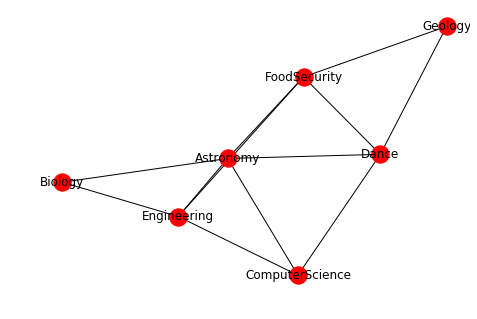

In [6]:
# Convert the information above into a graph G.  First we create the vertices
# of our graph, which are precisely the set of courses.
G = nx.Graph()
G.add_nodes_from(CourseList)
Vertices = list(G.nodes)

# For each pair (i,j) of integers, with i<j, check whether the class lists of 
# Course i and Course j have any common students.  If they do, that's a 
# conflict, and so we must add edge (i,j) to our graph G.
n = nx.number_of_nodes(G)
for i in range(n):
    for j in range(i+1,n):
        CommonStudents = set(ClassList[i]).intersection(ClassList[j])
        if len(CommonStudents)>0:
            G.add_edge(Vertices[i], Vertices[j])
    
# Generate the optimal coloring of graph G, using our function above
OptimalColoring(G)

# Draw our graph G
nx.draw(G, with_labels=True, pos=nx.spring_layout(G))
plt.draw()